# BeautifulSoup 기초

## BeautifulSoup 특징
* HTML과 XML 파일에서 데이터들 뽑아내기 위한 파이썬 라이브러리
* HTML과 XML의 트리 구조를 탐색, 검색, 변경 가능
* 다양한 파서(parser)를 선택하여 이용 가능

|파서(parser)|선언|장점|단점|
|---|---|---|---|
|html.parser|BeautifulSoup(markup, 'html.parser')|설치 필요 없음 <br>적절한 속도||
|Ixml HTML parser| Beautifulsoup(markup, 'lxml')|매우 빠름|Ixml 추가 설치필요|
|Ixml XML parser|BeautifulSoup (markup, 'lxml-xml')<br>BeautifulSoup(markup, 'xml')|매우 빠름<br>유일한 xml parser|Ixml 추가 설치 필요|
|html5lib|BeautifulSoup (markup, 'htm15lib')|웹 브란우저와 같은 방식으로 파싱<br>유용한 HTML5 생성 |html5lib 추가 설치 필요<br>매우 느림|


## HTML 파싱(Parsing)

### 웹페이지 예제 생성

In [5]:
%%writefile exmple.html
<!DOCTYPE html>
<html>
    <head>
        <title>Page Title</title>
    </head>
    <body>
        <h1>Heading 1</h1>
        <p>Paragraph</p>
        <div>
            <a href="www.google.com">google</a>
        </div>
        <div class="class1">
            <p>a</p>
            <a href="www.naver.com">naver</a>
            <p>b</p>
            <p>c</p>
        </div>
        <div id='id1'>
            Example page
            <p>g</p>
        </div>
    </body>
</html>

Overwriting exmple.html


In [6]:
from bs4 import BeautifulSoup
import urllib.request

with open('exmple.html') as fp:
    soup = BeautifulSoup(fp, 'html.parser')  # (데이터, parser)

soup

<!DOCTYPE html>

<html>
<head>
<title>Page Title</title>
</head>
<body>
<h1>Heading 1</h1>
<p>Paragraph</p>
<div>
<a href="www.google.com">google</a>
</div>
<div class="class1">
<p>a</p>
<a href="www.naver.com">naver</a>
<p>b</p>
<p>c</p>
</div>
<div id="id1">
            Example page
            <p>g</p>
</div>
</body>
</html>

prettify 조금 더 보기 편하게 보기~

In [7]:
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Page Title
  </title>
 </head>
 <body>
  <h1>
   Heading 1
  </h1>
  <p>
   Paragraph
  </p>
  <div>
   <a href="www.google.com">
    google
   </a>
  </div>
  <div class="class1">
   <p>
    a
   </p>
   <a href="www.naver.com">
    naver
   </a>
   <p>
    b
   </p>
   <p>
    c
   </p>
  </div>
  <div id="id1">
   Example page
   <p>
    g
   </p>
  </div>
 </body>
</html>



tag 부분 불러 오기

In [8]:
soup.title

<title>Page Title</title>

In [9]:
soup.title.name

'title'

내용 불러 오기

In [10]:
soup.title.string

'Page Title'

부모 태그 불러오기

In [11]:
soup.title.parent

<head>
<title>Page Title</title>
</head>

In [12]:
soup.title.parent.name

'head'

In [13]:
soup.h1

<h1>Heading 1</h1>

In [14]:
soup.p # 가장 처음 의 태그를 불러옮

<p>Paragraph</p>

In [15]:
soup.div

<div>
<a href="www.google.com">google</a>
</div>

In [16]:
soup.a

<a href="www.google.com">google</a>

## HTML 태그 검색

* `find()` : 해당 조건에 맞는 하나의 태그를 가져옴.
* `find_all()`: 해당 조건에 맞는 모든 태그를 가져옴
* `select()` : CSS 선택자와 같은 형식으로 선택 가능

### find & find_all

In [17]:
soup_find = soup.find('div')
print(soup_find)

<div>
<a href="www.google.com">google</a>
</div>


In [18]:
soup_find_all = soup.find_all('div')
print(soup_find_all)

[<div>
<a href="www.google.com">google</a>
</div>, <div class="class1">
<p>a</p>
<a href="www.naver.com">naver</a>
<p>b</p>
<p>c</p>
</div>, <div id="id1">
            Example page
            <p>g</p>
</div>]


find_all 의 결과는 list 안에 들어가 있다. 
- 위의 결과를 보면 ```<div>, </div>``` 안 에 들어간 리스트로 결과값 리턴

### find_all(태그, 속성값)

In [19]:
find_by_id = soup.find_all('div', {'id':'id1'})
print(find_by_id)

[<div id="id1">
            Example page
            <p>g</p>
</div>]


In [20]:
find_by_class = soup.find_all('div', {'class':'class1'})
print(find_by_class)

[<div class="class1">
<p>a</p>
<a href="www.naver.com">naver</a>
<p>b</p>
<p>c</p>
</div>]


### ```<a href> ``` 에서 가져오기

In [22]:
soup.find('a')

<a href="www.google.com">google</a>

In [21]:
soup.find('a').get('href')

'www.google.com'

In [24]:
soup.find('a').get_text()

'google'

#### finde_all

In [25]:
site_names = soup.find_all('a')
site_names

[<a href="www.google.com">google</a>, <a href="www.naver.com">naver</a>]

In [26]:
for name in site_names:
    print(name)

<a href="www.google.com">google</a>
<a href="www.naver.com">naver</a>


In [27]:
for name in site_names:
    print(name.get('href'))

www.google.com
www.naver.com


In [28]:
for name in site_names:
    print(name.get_text())

google
naver


## select

* \# id접근
* . class접근

`div` 태그중에 `id= id1` 인 것 

In [32]:
id1 = soup.select('div#id1')
id1

[<div id="id1">
             Example page
             <p>g</p>
 </div>]

`div` 태그중에 `class= class1` 인것

In [33]:
class1 = soup.select('div.class1')
class1

[<div class="class1">
 <p>a</p>
 <a href="www.naver.com">naver</a>
 <p>b</p>
 <p>c</p>
 </div>]

`div 태그`중에 `class= class1` 인것 중에서 `a 태그`

In [31]:
class1_a = soup.select('div.class1 > a')
class1_a

[<a href="www.naver.com">naver</a>]

# 웹페이지 콘텐츠 가져오기

In [34]:
%%writefile anthem.html
<!DOCTYPE html>
<html>
<head>
</head>
    <body>
        <div>
            <p id="title">애국가</p>
            <p id="content">
                동해물과 백두산이 마르고 닳도록 하는님이 보우하사 우리나라만세.<br />
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
            </p>
            <p id="content">
                남산 위에 저 소나무 철갑을 두른 듯 바람 서리 불변함은 우리 기상일세.<br />
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
            </p>
            <p id="content">
                가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.<br />
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
            </p>
             <p id="content">
                이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.<br />
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br />
            </p>
        </div>
    </body>
</html>

Writing anthem.html


In [36]:
with open('anthem.html', encoding='utf8') as fp:
    soup = BeautifulSoup(fp, 'html.parser')

soup

<!DOCTYPE html>

<html>
<head>
</head>
<body>
<div>
<p id="title">애국가</p>
<p id="content">
                동해물과 백두산이 마르고 닳도록 하는님이 보우하사 우리나라만세.<br/>
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
<p id="content">
                남산 위에 저 소나무 철갑을 두른 듯 바람 서리 불변함은 우리 기상일세.<br/>
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
<p id="content">
                가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.<br/>
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
<p id="content">
                이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.<br/>
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.<br/>
</p>
</div>
</body>
</html>

In [39]:
title = soup.find('p',{'id':'title'})
contents = soup.find_all('p',{'id':'content'})

print(title.get_text())
for text in contents:
    print(text.get_text())

애국가

                동해물과 백두산이 마르고 닳도록 하는님이 보우하사 우리나라만세.
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.


                남산 위에 저 소나무 철갑을 두른 듯 바람 서리 불변함은 우리 기상일세.
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.


                가을 하늘 공활한데 높고 구름 없이 밝은 달은 우리 가슴 일편단심일세.
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.


                이 기상과 이 맘으로 충성을 다하여 괴로우나 즐거우나 나라 사랑하세.
                무궁화 삼천리 화려 강산 대한 사람, 대한으로 길이 보전하세.



## 인터넷 웹 페이지 가져오기 

http://suanlab.com/

In [40]:
url = 'http://suanlab.com/'
html = urllib.request.urlopen(url).read()

soup = BeautifulSoup(html, 'html.parser')
soup 

<!DOCTYPE html>

<!--[if IE 8]>			<html class="ie ie8"> <![endif]-->
<!--[if IE 9]>			<html class="ie ie9"> <![endif]-->
<!--[if gt IE 9]><!--> <html> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>Home | SuanLab</title>
<meta content="Suan, Computer, Data, Course, Lecture, Research, Big Data, Machine Learning, Deep Learning, Cloud Computing, Data Analysis, Visualzation" name="keywords"/>
<meta content="Suan Computer Laboratory" name="description"/>
<meta content="Suan Lee" name="Author"/>
<!-- mobile settings -->
<meta content="width=device-width, maximum-scale=1, initial-scale=1, user-scalable=0" name="viewport"/>
<!--[if IE]><meta http-equiv='X-UA-Compatible' content='IE=edge,chrome=1'><![endif]-->
<!-- WEB FONTS : use %7C instead of | (pipe) -->
<link href="https://fonts.googleapis.com/css?family=Open+Sans:300,400%7CRaleway:300,400,500,600,700%7CLato:300,400,400italic,600,700" rel="stylesheet" type="text/css"/>
<!-- CORE CSS -->
<link href="assets/plugins/bootstrap/css/boot

분석 도구를 열고 아래와 같이 구조를 파악한다. 

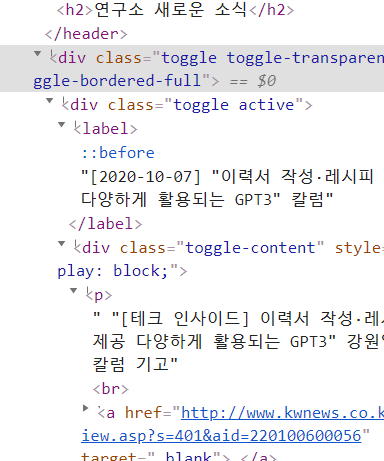

label 태그 안에 제목이 있는것을 확인했고 , label 태그의 모든 내용을 가져온다. 

In [41]:
labels = soup.find_all(['label'])
for label in labels:
    print(label.get_text())

[2020-10-07] "이력서 작성·레시피 제공 다양하게 활용되는 GPT3" 칼럼
[2020-05-20] "인공지능의 보안 위협" 칼럼
[2020-03-04] "데이터 경제 시대" 칼럼
[2019-12-25] "마이데이터 시대의 도래 데이터 주권과 새로운 가치" 칼럼
[2019-09-25] "유튜브 탄생과 크리에이터 시대" 칼럼
[2019-09-04] "농업으로 들어간 인공지능" 칼럼
[2019-08-07] "AI시대 지배할 것인가 지배당하며 살 것인가" 칼럼
[2018-12-30] "파이썬으로 텍스트 분석하기" 책 출판


select 로는 어떻게 해야 할까? 

* select 는 css 를 가져온다. 
* 

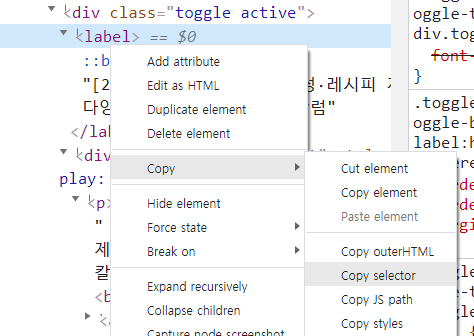

Copy selector 를 한 결과 값은 아래와 같다. 

```
#wrapper > section > div > div > div:nth-child(1) > div > div:nth-child(1) > label
```

```
nth-child(1) 부분은 첫번째를 의미 하기 때문에 제거해준다. 우리는 하나만 가져 오려는게 아니기 때문에
```

In [43]:
labels = soup.select('#wrapper > section > div > div > div > div > div > label')
for label in labels:
    print(label.get_text())

[2020-10-07] "이력서 작성·레시피 제공 다양하게 활용되는 GPT3" 칼럼
[2020-05-20] "인공지능의 보안 위협" 칼럼
[2020-03-04] "데이터 경제 시대" 칼럼
[2019-12-25] "마이데이터 시대의 도래 데이터 주권과 새로운 가치" 칼럼
[2019-09-25] "유튜브 탄생과 크리에이터 시대" 칼럼
[2019-09-04] "농업으로 들어간 인공지능" 칼럼
[2019-08-07] "AI시대 지배할 것인가 지배당하며 살 것인가" 칼럼
[2018-12-30] "파이썬으로 텍스트 분석하기" 책 출판


출처:

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

http://suanlab.com/

